# Practica ML


# Importació de les llibreries
Per a importar i poder fer referència a les distintes funcions de les llibreries hem d'executar les següents comandes:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Anàlisi de dades


#### Carregues Datasets


Carregam el dataset de vi tint a un dataframe a partir del fitxer csv: "winequality-red.csv" i cream un valor fixe del tipus vi, en aquest cas, "tinto".

In [89]:
tinto = pd.read_csv('winequality-red.csv', sep = ';')
tinto["type"] = "tinto" 
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


ERROR! Session/line number was not unique in database. History logging moved to new session 6


Feim el mateix amb el dataset del vi blanc, amb el fitxer csv: "winequality-white.csv" i cream un valor fixe del tipus vi, en aquest cas, "blanc".

In [90]:
blanc = pd.read_csv('winequality-white.csv', sep = ';')
blanc["type"] = "blanc" 
blanc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


En aquest apartat juntarem els dos datasets en un i transformarem tots els valors a númerics per a que aixi es pugui fer una comparació entre ells.


Juntam els dos datasets 'blanc' i 'tinto' dins vins

In [91]:
vins = pd.concat([blanc, tinto])
vins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


#### Exploracio Datasets
En aquest apartat farem una exploració del conjunt de dades.

##### Quality

A continuació mostram els vins segons la seva qualitat, com podem veure, hi ha una gran diferencia entre el número de mostres d'una qualitat i una altra, això, a la hora de la predicció dels algorismes podria afectar degut a que podrà tenir massa poques mostres de qualcunes qualitats.

<AxesSubplot:xlabel='quality', ylabel='count'>

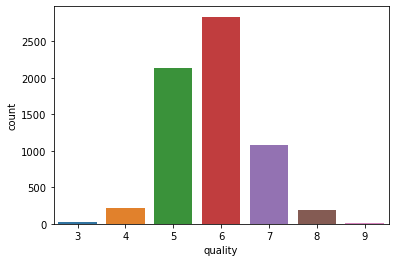

In [10]:
sns.countplot(x='quality', data=vins)

Per veure millor l'estat de cada qualitat mostrarem una taula

In [19]:
# Proporcio de cada clase
pd.DataFrame(vins["quality"].value_counts(), vins["quality"].value_counts(normalize=True), columns=["Count", "Proportion"])
pd.concat(
    [
        vins["quality"].value_counts().rename('Count'),
        vins["quality"].value_counts(normalize=True).rename('Proporcio'),
    ],
    axis=1)

,Count,Proporcio
6,2836,0.436509
5,2138,0.329075
7,1079,0.166077
4,216,0.033246
8,193,0.029706
3,30,0.004618
9,5,0.000770


Tenim dues qualitats amb molt baixa representació:
* **3:** 30 mostres - menys d'un 1 percent de la mostra total
* **9:** 5 mostres - menys d'un 0.1 percent de la mostra total

Algunes solucions proposadas en <a href="https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/">aquest post d'Internet</a> son:
* **Oversampling:** crea noves mostres duplicant o de manera sintetica
* **Undersampling:** reduir les mostres de les clases amb mes representació

Per ara no farem res, depenguent del resultats dels models prendrem una decisio.

##### Variables categóricas

<AxesSubplot:xlabel='type', ylabel='count'>

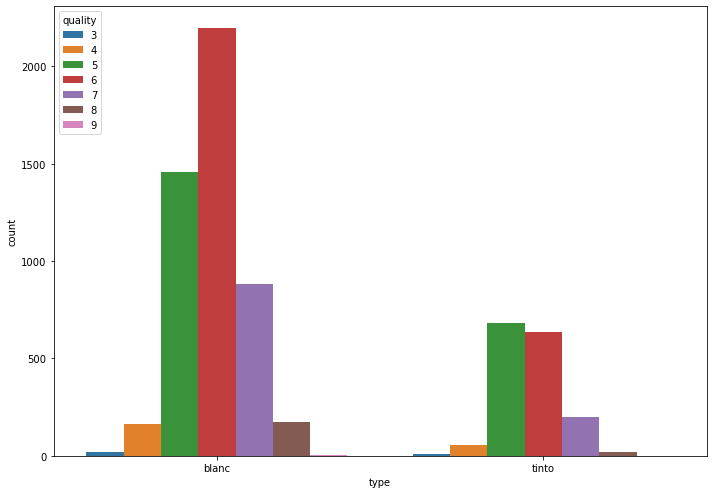

In [31]:
_, ax = plt.subplots(figsize=(11.7, 8.27))
sns.countplot(x="type", hue="quality", data=vins, ax=ax)
fig.plt()

In [35]:
vins.type.value_counts()

blanc    4898
tinto    1599
Name: type, dtype: int64

Conclusións d'aquest gráfic i taula:
* Tenim ~2.5 vegades mes blancas que tintos
* El vins de qualitat 6 dominen en la categoría de blancas
* Per lo que respecta a tintos la lluita esta entre la qualitat 5 i 6

Aquests dos darrers punts poden ser importants per el model. Per poder emprar aquesta variable tendrem que aplicar un OneHotEncoder.

##### Variables númericas

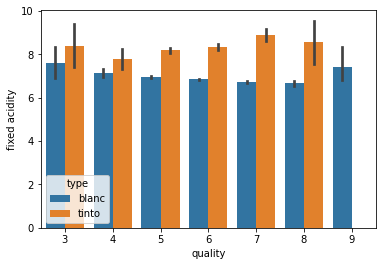

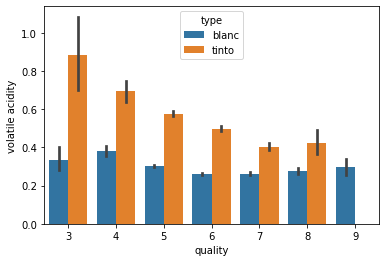

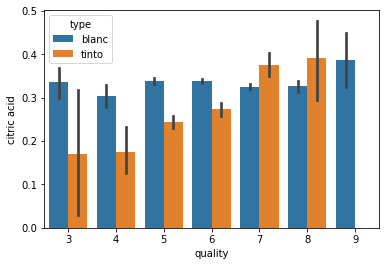

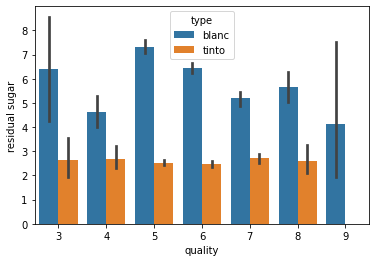

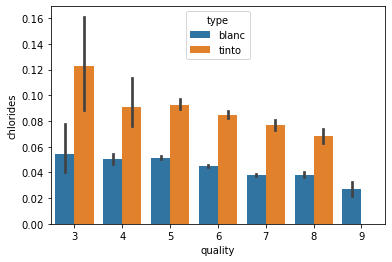

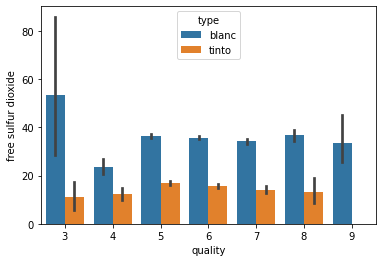

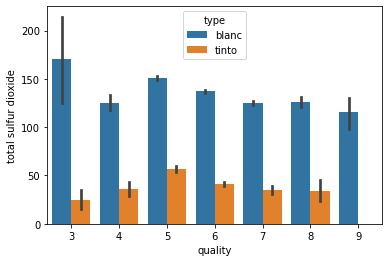

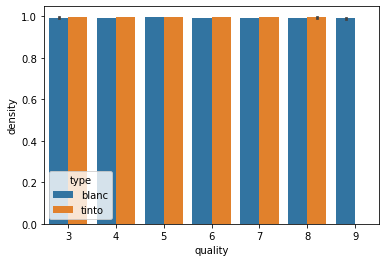

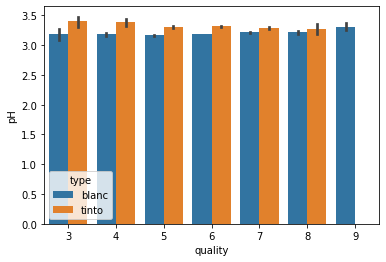

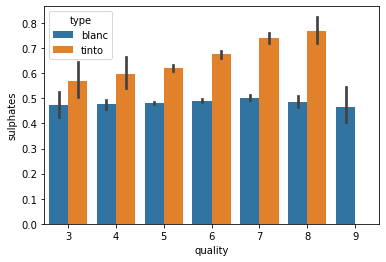

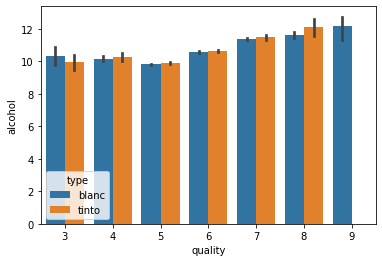

In [43]:
numeric_features = vins.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove("quality")
for feature in numeric_features:
    # plt.figure(i)
    plt.figure()
    sns.barplot(x="quality", y=feature, hue="type", data=vins)

Podem veure la disparitat entre les característiques de cada vi segons el seu tipus, i com afecten aquestes a la valoració final de la qualitat. Un exemple es el de sulphates, on podem veure que el seu valor no afecta en la valoració de la qualitat dels vins blancs , pero si que ho fa de forma positiva amb els vins tints. També crida la atenció que cap vi tint aconsegueix tenir una valoració en la qualitat de 9. El fet d'haver separat els vins segons el tipus serà molt útil a la hora de la predicció dels algorismes, ja que si no s'hagués fet, es podria veure que l'algorisme tendria mes dificultats.

##### Outliers

A continuació mostrarem un boxplot que nos mostrarà si qualcuna de les nostres variables te valors extrems o ouliers

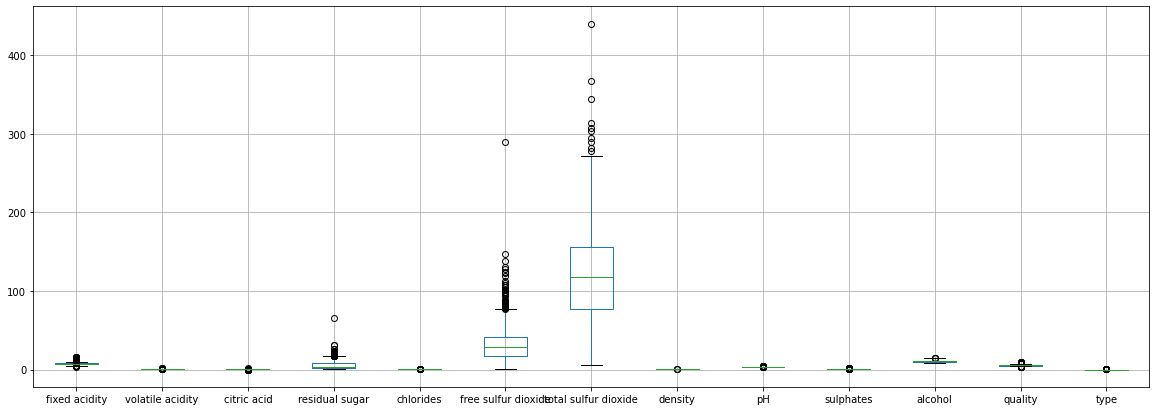

In [10]:
vins.boxplot(figsize=(20,7))

Degut a la variacio en el rango de valores node podem veure be la distribució d'algunes variables.

<AxesSubplot:>

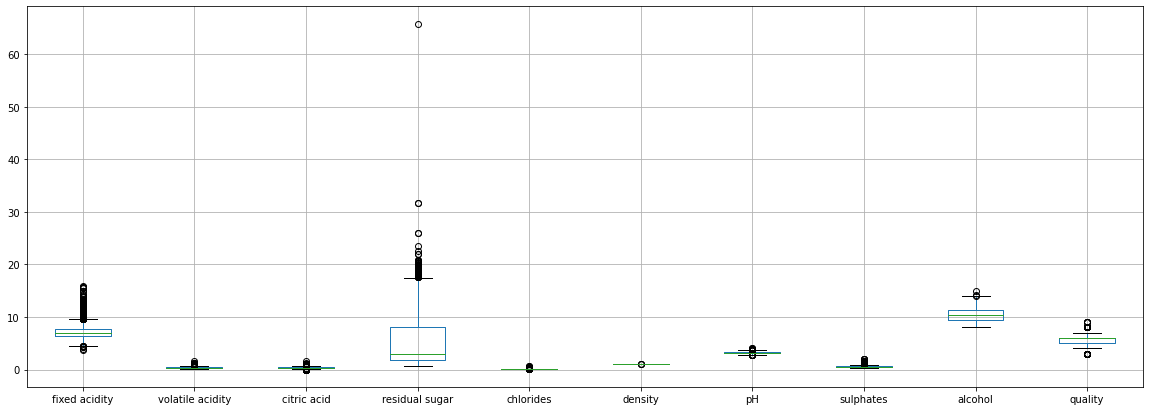

In [46]:
vins.drop(["total sulfur dioxide", "free sulfur dioxide"], axis=1).boxplot(figsize=(20,7))

Com a conclusions podem treure:
* Tenim una serie de valors outliers. Destacan alguns en concret, com el valor ~65 en la variable residual sugar. Le variables amb més outliers son:
    * fixed acidity
    * residual sugar
    * free sulfur dioxide 
    * total sulfur dioxide
* Poca variacio en algunes variables

##### Taula de correlacions

Taula que mostra les correlacions entre cada característica del vi.
Quan més allunyat de 0 es el valor, mes relació amb el posible valor d'una característica te. 
Si es negatiu el valor vol dir que la seva relació es inversa (quan un puja l'altre baixa) i sino es que es directa.

<AxesSubplot:>

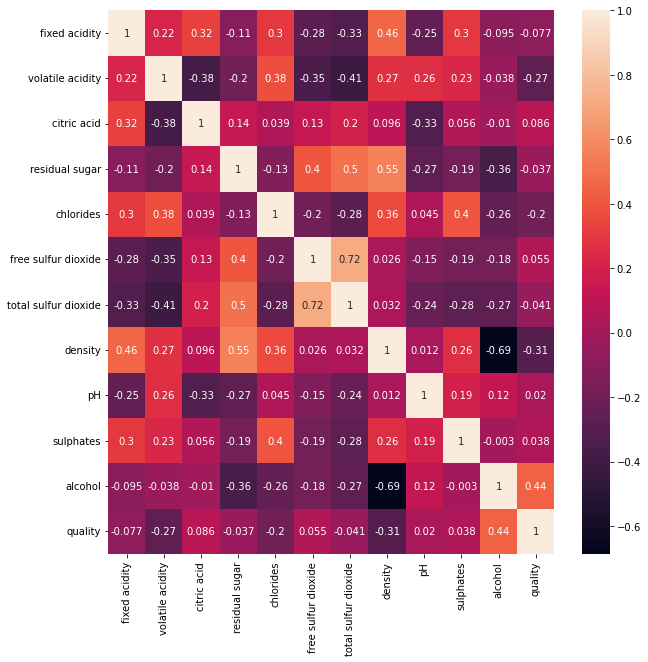

In [56]:
corr_df = vins.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)

Veim que quality te molta relacio amb alcohol i density. Per poder veure millor les variables molt correlacionadas aplciarem un filtre.

<AxesSubplot:>

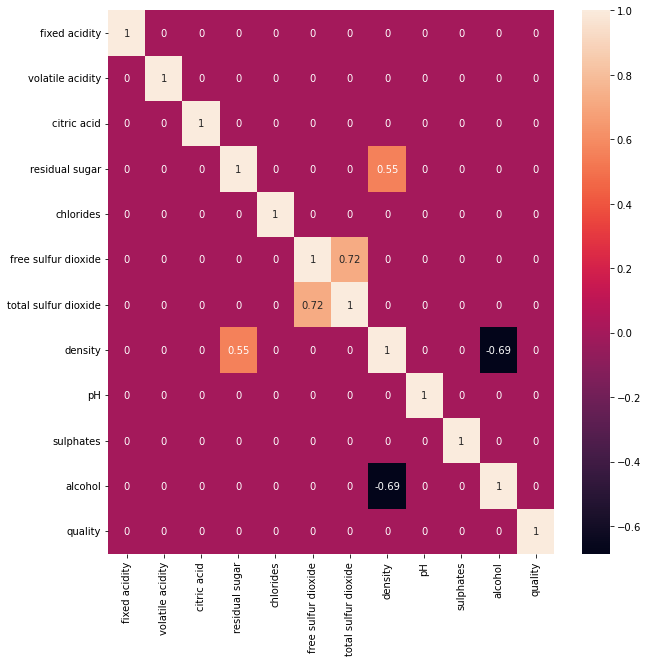

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df[(corr_df > 0.5) | (corr_df < -0.5)].fillna(0), annot=True)

Veim una alte correlacio entre:
* density - alcohol
* density - residual sugar

Aquesta relacio pot afectar depenent del model. Per ara no farem res. Mes endavant pot ser tenguqem que eliminar la variable density

# Preparació de les dades

#### Divisió train/test
Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediu-re amb l'algorisme

In [92]:
from sklearn.model_selection import train_test_split

y = vins["quality"]
X = vins.drop(["quality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Preparacio Dades X

Les transformacions a fer son:
* Encodear la variable type. En aquest cas emprarem LabelEncoder perque tenim dues categories. En cas de tenirne mes i que aquestes no presentesin ordre empreraiam OneHotEncoder.
* MinMaxScaler sobre les variables númericas

In [93]:
type_encoder = LabelEncoder()

X_train["type"] = type_encoder.fit_transform(X_train["type"])
X_test["type"] = type_encoder.transform(X_test["type"])

In [94]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1700,6.7,0.26,0.30,1.8,0.043,25.0,121.0,0.99440,3.44,0.61,10.2,0
301,11.1,0.18,0.48,1.5,0.068,7.0,15.0,0.99730,3.22,0.64,10.1,1
3340,6.2,0.30,0.31,1.2,0.048,19.0,125.0,0.98999,3.32,0.54,12.6,0
86,7.2,0.39,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,0
689,8.1,0.38,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4,1


In [95]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [98]:
# Exemple del primer registre
X_train[0]

array([0.23966942, 0.12      , 0.18072289, 0.03870968, 0.05175292,
       0.16494845, 0.31900139, 0.3137678 , 0.61016949, 0.21714286,
       0.31884058, 0.        ])

# Classificació «9 qualitats»

## Regresió Logística

In [99]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.01      0.03        71
           5       0.60      0.63      0.62       707
           6       0.53      0.73      0.61       939
           7       0.49      0.13      0.21       364
           8       0.00      0.00      0.00        57

    accuracy                           0.55      2145
   macro avg       0.44      0.25      0.24      2145
weighted avg       0.55      0.55      0.51      2145



#### Anàlisi Resultats

Per començar podem veure que els valors que tenen menys mostres no presenten prediccions i per tant el seu recall es 0, això es degut a que l'algorisme te menys "training" amb aquests resultats i es més dificil acertar ja que els confon amb altres valors
En el cas de qualitat 4 veum que te una presició de 1 pero un recall quasi null, aixo vol dir que haura predit un o dos quatres i els dos ho eren, pero com que n'hi ha 71, vol dir que uns 69 o 70 no han estat predits correctament.
També podem veure que a mesura que aumenta el nombre de mostres, el recall aumenta, això es degut a que com que te mes exemples, tendeix a predir mes els valors que ha vist mes, d'aqui l'alt recall. La precisió es mes baixa degut al mateix motiu, i es que predeix vins en aquelles qualitats que no hu son.

## Perceptró

In [104]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)

from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)

print(classification_report(y_test, y_hat, zero_division=0))

#### Anàlisi Resultats

En el cas del perceptró podem veure que només prediu els dos valors amb més mostres, es por això que el seu recall es 
més elevat que en el cas anterior, el problema que te es que el seu % de predicció es més baix.
Comparat amb el Logistic Regression podem dir que no ho millora ya que els seus weighted avg son menors en ambdós casos

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.62      0.07      0.13        71
           5       0.68      0.72      0.70       707
           6       0.64      0.76      0.69       939
           7       0.68      0.48      0.56       364
           8       0.89      0.30      0.45        57

    accuracy                           0.66      2145
   macro avg       0.59      0.39      0.42      2145
weighted avg       0.66      0.66      0.64      2145



#### Anàlisi Resultats

En este cas podem veure que els valors de precisió son parescuts en totes les dades amb una mostra significativa,
a més aquests son més elevats que amb els altres dos algorismes i venen acompanyats d'un alt recall, d'alla que el seu weighted avg sigui més alt. Aquest algorisme te un exit molt més alt a les mostres mes petites i aixo fa que les prediccions de totes les qualitats en general sigui més alta.

# Classificació «3 qualitats»

#### Preparació dades

Primer preparam les dades per que estiguin dividides en 3 qualitats
Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)

In [18]:
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)
print(vins)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#### Divisió train/test

Asignam a 'y' la columna de "quality" y a 'x' les altres

In [19]:
y = vins["quality"]
X = vinsaux.values 

Escalam les dades de X

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediur-re amb l'algorisme

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Regresió Logística

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))


              precision    recall  f1-score   support

          bo       0.59      0.26      0.36       421
      dolent       0.65      0.67      0.66       785
       mitja       0.53      0.66      0.59       939

    accuracy                           0.58      2145
   macro avg       0.59      0.53      0.54      2145
weighted avg       0.59      0.58      0.57      2145



#### Anàlisi Resultats

Amb les qualitats dividides en 3, les mostres de cada valor son majors i per tant les prediccions son més acertades com podem veure.
Encara així podem veure que en el cas de vins bons, al tenir un número de mostres considerablement inferior als altres dos, sofreix un poc en la predicció i tendeix a estar classificat a una de les altres qualitats per l'algorisme

## Perceptró

In [23]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))


              precision    recall  f1-score   support

          bo       0.45      0.31      0.37       421
      dolent       0.67      0.60      0.63       785
       mitja       0.51      0.63      0.57       939

    accuracy                           0.56      2145
   macro avg       0.54      0.51      0.52      2145
weighted avg       0.56      0.56      0.55      2145



#### Anàlisi Resultats

Amb el canvi de qualitats, podem veure que el perceptró se iguala un poc més a la regresió logística, i per tant ha estat mes beneficiat per el canvi.

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))
#El Random Forest sigue teniendo unos resultados bastante buenos pero es el que mejora menos respecto al cambio.

              precision    recall  f1-score   support

          bo       0.75      0.56      0.64       421
      dolent       0.73      0.75      0.74       785
       mitja       0.65      0.71      0.68       939

    accuracy                           0.70      2145
   macro avg       0.71      0.67      0.69      2145
weighted avg       0.70      0.70      0.70      2145



#### Anàlisi Resultats

El Random Forest segueix tenguent els millors resultats, però es el que menys millora amb el canvi, això es degut a que el canvi fa que les mostres de cada un aumentin, i el que feia destacar més a l'algorisme era el fet de que acertaba molt en les mostres de menys tamany.

# Conclusions

Podem concluir llavors que a mesura que aumenta el nombre de mostres, les prediccions son més precises, i que quan mes proporcionals siguin el nombre de mostres entre cada conjunt, millor.
També podem dir que l'algorisme de Random Forest es el que presenta uns millor resultats degut a la seva capacitat per tenir en compte mostres més petites, i que degut a aquesta ventatja es també el que menys es favoreix d'una reducció a 3 qualitats, encara que també millora

# Apartat B
En aquest apartat intentarem fer una criba de dades, agafant només aquelles que son més relevants per a la predicció de la qualitat.

In [106]:
vins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


Transformam la columna type en valors numerics, on blanc=0 i tint=1.

In [107]:
label_encoder = LabelEncoder()
vins["type"] = label_encoder.fit_transform(vins["type"])

## Tecniques Utilitzades

### Taula de correlacions

Feim i mostram la taula de correlació entre les caracteristiques dels vins

<AxesSubplot:>

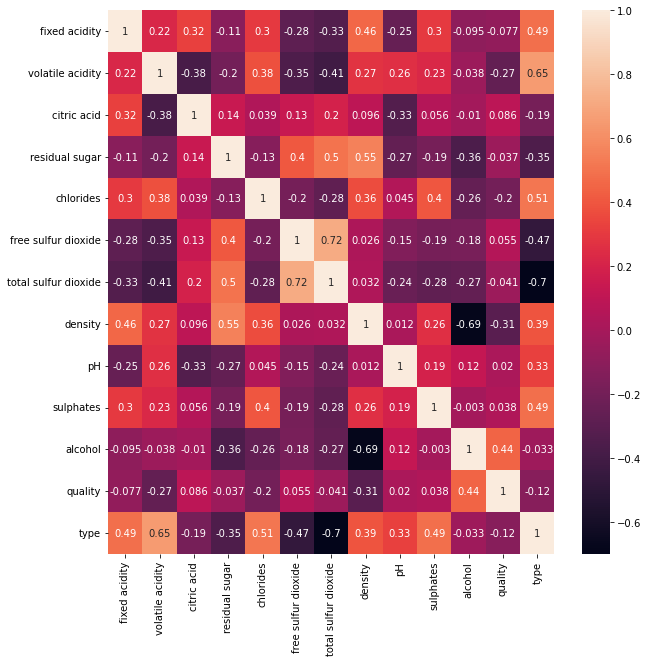

In [110]:
corr_df = vins.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)

Ara llevam les columnes que tenen menys relació amb la qualitatístiqu. Decidim que totes les caracteres que tenguin una correlació dins (-0.1,0.1) no son necessàries. Hem triat aquest valor ja que l'objectiu es tenir encara varietat per els possibles diferents casos, pero també ho es llevar dades el que fan es molestar a l'hora de prediu-re una qualitat, ja que els algorismes de predicció li donen importància al PH per exemple, quan el valor d'aquest no influeix en la qualitat del vi, i per tant fa que es desvirtuin les prediccions de la qualitat.

In [120]:
columns_low_related = list(corr_df[["quality"]][(corr_df > -0.1) & (corr_df < 0.1)].dropna().index)
columns_low_related

['fixed acidity',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates']

Mostram una altra vegada la taula de correlacions, pero ara amb les columnes menys rellevants a la qualitat llevades.

<AxesSubplot:>

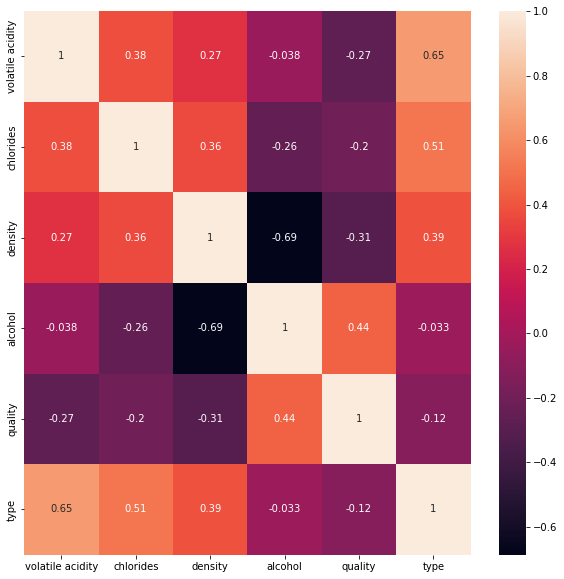

In [121]:
features = [column for column in vins.columns if column not in columns_low_related]
plt.figure(figsize=(10,10))
sns.heatmap(vins[features].corr(), annot=True)

## Divisió Train/Test

Asignam a 'y' la columna de "quality" y a 'x' les altres. Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediur-re amb l'algorisme

In [122]:
y = vins["quality"]
X = vins.drop(["quality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Escalam les dades de X. Anteriorment  ja hem fet un LabelEncoder sobre la variable categórica

In [123]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [124]:
# Exemple del primer registre
X_train[0]

array([0.23966942, 0.12      , 0.18072289, 0.03870968, 0.05175292,
       0.16494845, 0.31900139, 0.3137678 , 0.61016949, 0.21714286,
       0.31884058, 0.        ])

# Classificació «9 qualitats»

## Regresió Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.03      0.05        71
           5       0.90      1.00      0.95       707
           6       0.97      1.00      0.98       939
           7       0.85      0.92      0.89       364
           8       0.00      0.00      0.00        57

    accuracy                           0.92      2145
   macro avg       0.62      0.49      0.48      2145
weighted avg       0.90      0.92      0.90      2145



#### Anàlisis Resultats

Podem veure que el fet d'haver llevat les columnes amb menys correlació ha ajudat bastant a les prediccions. En el cas de la Regresió Logística podem veure com els valors amb més mostres presenten una precisió i un recall quasi perfectes. Encara així podem veure que a la hora de prediu-re dades amb menys mostres segueix presentant els problemes d'abans.


## Perceptró

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.06      0.10        71
           5       0.86      0.97      0.91       707
           6       0.75      0.96      0.85       939
           7       0.61      0.25      0.35       364
           8       0.00      0.00      0.00        57

    accuracy                           0.78      2145
   macro avg       0.48      0.37      0.37      2145
weighted avg       0.74      0.78      0.73      2145



#### Anàlisis Resultats

Amb el Perceptró podem veure que pasa el mateix que amb la Regresió Logística, només que els valors de precisió i recall son més baixos.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.93      1.00      0.97        71
           5       1.00      1.00      1.00       707
           6       1.00      1.00      1.00       939
           7       1.00      1.00      1.00       364
           8       1.00      0.98      0.99        57

    accuracy                           1.00      2145
   macro avg       0.99      0.88      0.90      2145
weighted avg       1.00      1.00      1.00      2145



#### Anàlisis Resultats

El Random Forest, es el que obte una millora més notable ja que obté una precisió de quasi el 100%, només 
fallant en la predicció de alguns dels casos amb menys mostres donant 3 com a  4 y qualque 8 com a 7

# Classificació «3 qualitats»

#### Preparació dades

Primer preparam les dades per que estiguin dividides en 3 qualitats
Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)

In [ ]:
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)

Asignam a 'y' la columna de "quality" y a 'x' les altres

In [ ]:
y = vins["quality"]
X = vinsaux.values 

Escalam les dades de X

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediur-re amb l'algorisme

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Regresió Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



#### Anàlisi Resultats

Veim com dividint les qualitats en tres, ara la presició i recall son del 100% ja que ara te menys mostres de cada categoria que era on tenia el problema abans

## Perceptró

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

          bo       0.89      1.00      0.94       421
      dolent       0.75      1.00      0.86       785
       mitja       1.00      0.67      0.80       939

    accuracy                           0.86      2145
   macro avg       0.88      0.89      0.87      2145
weighted avg       0.89      0.86      0.85      2145



#### Anàlisi Resultats

El perceptró millora com podiem esperar, pero no consegueix un 100% de precissiño ni recall degut a que tendeix a valorar massa vins com a mitjans quan no ho son

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



#### Anàlisi Resultats

Com podiem esperar l'algorisme del Random Forest consegueix una presició i un Recall del 100%, ja que quasi era perfecte amb la divisió de 9 qualitats i ara els llocs on tenia problemes estan agrupats en mateixes categories (3 i 4 dolents i 7 i 8 bons).

# Conclusions

Hem pogut veure que el fet de llevar les dades irrellevants ha ajudat als 3 algorismes a tenir unes millors prediccions, això es degut a que quan fan les prediccions els algorismes donen la mateixa importància a totes les dades, i si aquestes no influeixen en el valor que s'està predint, llavors l'únic que fan aquestes dades es molestar a la hora de prediu-re les qualitats.